In [1]:
from model import Net
from utils import get_dst_device, print_model_summary
device = get_dst_device()
model = Net().to(device)
print_model_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             910
       BatchNorm2d-6           [-1, 10, 24, 24]              20
              ReLU-7           [-1, 10, 24, 24]               0
           Dropout-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10           [-1, 10, 10, 10]             910
      BatchNorm2d-11           [-1, 10, 10, 10]              20
             ReLU-12           [-1, 10, 10, 10]               0
          Dropout-13           [-1, 10, 10, 10]               0
           Conv2d-14             [-1, 1

Batch Size torch.Size([128, 1, 28, 28])


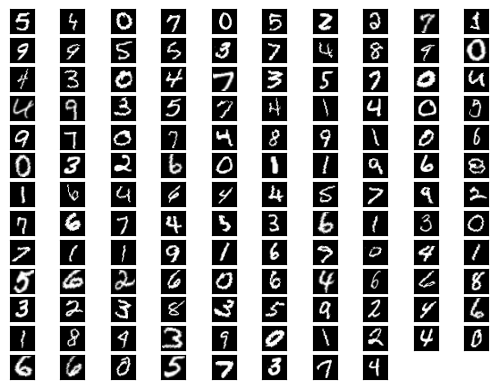

In [2]:
from utils import setup_test_loader, setup_train_loader, plot_data
train_loader = setup_train_loader("../data")
test_loader = setup_test_loader("../data")
plot_data(train_loader)

In [3]:
import torch.optim as optim
import torch.nn.functional as F
from utils import train_model, test_model
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20
train_loss_per_epoch = []
test_loss_per_epoch = []
train_accuracy_per_epoch = []
test_accuracy_per_epoch = []
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  [train_accuracy, train_loss] = train_model(model, device, train_loader, optimizer, criterion)
  train_accuracy_per_epoch.append(train_accuracy)
  train_loss_per_epoch.append(train_loss)

  [test_accuracy, test_loss] = test_model(model, device, test_loader, criterion)
  test_accuracy_per_epoch.append(train_accuracy)
  test_loss_per_epoch.append(train_loss)

  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2689 Batch_id=468 Accuracy=83.94: 100%|██████████| 469/469 [00:38<00:00, 12.30it/s]

[87.92841465473578, 96.23257193711065, 82.30949983215844, 82.72712444951884, 83.00239643957549, 81.64545286847445, 86.88746198039878, 79.92019154030328, 78.43103742949923, 78.65187426458228]


Test set: Average loss: 0.0980, Accuracy: 9726/10000 (97.26%)

[98.77551020408163, 99.73568281938327, 95.83333333333334, 98.51485148514851, 98.77800407331976, 97.19730941704036, 96.86847599164928, 96.49805447470817, 93.01848049281314, 97.02675916749257]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2289 Batch_id=468 Accuracy=95.95: 100%|██████████| 469/469 [00:37<00:00, 12.61it/s]

[97.4674995779166, 98.35360427172945, 94.5115810674723, 94.87848638068832, 96.18281410475863, 95.62811289429995, 97.27948631294356, 95.43495610534717, 94.63339600068365, 94.82265927046562]


Test set: Average loss: 0.0640, Accuracy: 9785/10000 (97.85%)

[98.16326530612245, 99.64757709251101, 97.28682170542635, 98.51485148514851, 98.16700610997964, 98.09417040358744, 97.4947807933194, 97.27626459143968, 95.99589322381931, 97.62140733399404]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0795 Batch_id=468 Accuracy=96.74: 100%|██████████| 469/469 [00:36<00:00, 13.02it/s]

[98.19348303224717, 98.33877187778107, 95.23329976502181, 96.21595172076334, 96.6621020198562, 96.58734550820883, 97.78641432916527, 96.75977653631284, 95.62467954195864, 95.76399394856278]


Test set: Average loss: 0.0513, Accuracy: 9836/10000 (98.36%)

[99.28571428571429, 99.38325991189427, 97.67441860465115, 98.91089108910892, 98.87983706720978, 98.99103139013454, 97.39039665970772, 98.44357976653697, 97.74127310061603, 96.82854311199208]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0292 Batch_id=468 Accuracy=97.01: 100%|██████████| 469/469 [00:36<00:00, 12.71it/s]

[98.42984973830829, 98.51676060516166, 95.56898288016113, 96.52585222639047, 96.7819239986306, 97.08540859619997, 98.09057113889827, 96.69592976855547, 96.15450350367458, 96.04975626155657]


Test set: Average loss: 0.0443, Accuracy: 9865/10000 (98.65%)

[99.18367346938776, 99.73568281938327, 99.2248062015504, 98.91089108910892, 98.26883910386965, 98.76681614349776, 98.22546972860125, 98.63813229571986, 97.94661190965093, 97.42319127849356]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0664 Batch_id=468 Accuracy=97.30: 100%|██████████| 469/469 [00:37<00:00, 12.63it/s]

[98.44673307445552, 98.63541975674875, 95.93823430681437, 97.27613766106671, 97.15850736049299, 97.32521674967718, 98.15816154106118, 97.31843575418995, 96.1715945992138, 96.33551857455035]


Test set: Average loss: 0.0442, Accuracy: 9856/10000 (98.56%)

[99.38775510204081, 99.73568281938327, 97.77131782945736, 98.8118811881188, 99.69450101832994, 97.75784753363229, 98.32985386221294, 98.92996108949417, 97.1252566735113, 97.81962338949455]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0643 Batch_id=468 Accuracy=97.40: 100%|██████████| 469/469 [00:36<00:00, 12.97it/s]

[98.69998311666384, 98.65025215069713, 96.13964417589796, 97.50448540205512, 97.44950359465936, 97.3621103117506, 97.98918553565393, 97.23862729449321, 96.5134165099983, 96.26828038325769]


Test set: Average loss: 0.0389, Accuracy: 9880/10000 (98.80%)

[99.59183673469387, 99.73568281938327, 98.06201550387597, 99.10891089108911, 99.4908350305499, 98.87892376681614, 98.53862212943632, 98.73540856031128, 97.5359342915811, 98.21605550049554]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0307 Batch_id=468 Accuracy=97.58: 100%|██████████| 469/469 [00:36<00:00, 12.81it/s]

[98.46361641060274, 98.78374369623258, 96.44175897952333, 97.5697276137661, 97.77473467990414, 97.82327983766834, 98.51301115241635, 97.28651237031126, 96.56468979661597, 96.402756765843]


Test set: Average loss: 0.0358, Accuracy: 9888/10000 (98.88%)

[99.59183673469387, 99.73568281938327, 99.2248062015504, 99.3069306930693, 99.08350305498982, 98.4304932735426, 98.64300626304802, 98.83268482490273, 98.04928131416838, 97.7205153617443]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.1763 Batch_id=468 Accuracy=97.69: 100%|██████████| 469/469 [00:35<00:00, 13.03it/s]

[98.83504980584163, 99.0210619994067, 96.65995300436389, 97.70021203718807, 97.87743923313934, 97.30676996864047, 98.42852314971275, 97.6536312849162, 96.76978294308665, 96.41956631366617]


Test set: Average loss: 0.0346, Accuracy: 9891/10000 (98.91%)

[99.6938775510204, 99.38325991189427, 99.2248062015504, 99.20792079207921, 99.18533604887983, 98.87892376681614, 98.22546972860125, 98.83268482490273, 98.76796714579056, 97.62140733399404]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0645 Batch_id=468 Accuracy=97.81: 100%|██████████| 469/469 [00:36<00:00, 12.97it/s]

[98.8856998142833, 98.90240284781964, 97.1802618328298, 97.73283314304355, 97.67203012666896, 97.69415237041136, 98.36093274754984, 97.74940143655228, 96.99196718509656, 96.80618591359892]


Test set: Average loss: 0.0383, Accuracy: 9881/10000 (98.81%)

[99.48979591836735, 99.82378854625551, 97.48062015503875, 98.8118811881188, 99.4908350305499, 98.31838565022422, 98.95615866388309, 99.22178988326849, 99.07597535934292, 97.32408325074331]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0446 Batch_id=468 Accuracy=97.78: 100%|██████████| 469/469 [00:36<00:00, 12.91it/s]

[98.78439979739997, 98.93206763571641, 96.8445787176905, 97.73283314304355, 97.56932557343376, 97.49123777900756, 98.52990875295708, 97.87709497206704, 97.06033156725347, 96.7725668179526]


Test set: Average loss: 0.0334, Accuracy: 9891/10000 (98.91%)

[99.79591836734694, 99.64757709251101, 99.03100775193798, 99.10891089108911, 99.59266802443992, 98.4304932735426, 98.22546972860125, 99.12451361867704, 98.4599589322382, 97.52229930624381]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0520 Batch_id=468 Accuracy=97.85: 100%|██████████| 469/469 [00:36<00:00, 12.88it/s]

[98.90258315043053, 98.78374369623258, 96.99563611950319, 97.81438590768227, 97.94590893529613, 97.78638627559491, 98.52990875295708, 97.829209896249, 96.9406938984789, 96.87342410489158]


Test set: Average loss: 0.0375, Accuracy: 9868/10000 (98.68%)

[99.48979591836735, 99.64757709251101, 99.03100775193798, 98.91089108910892, 98.67617107942974, 99.2152466367713, 98.74739039665971, 98.44357976653697, 97.5359342915811, 97.02675916749257]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.1212 Batch_id=468 Accuracy=97.83: 100%|██████████| 469/469 [00:36<00:00, 12.90it/s]

[98.98699983116663, 98.90240284781964, 96.92849949647533, 97.70021203718807, 97.58644299897296, 97.87862018077846, 98.34403514700912, 97.90901835594573, 97.07742266279269, 96.85661455706841]


Test set: Average loss: 0.0316, Accuracy: 9898/10000 (98.98%)

[99.59183673469387, 99.82378854625551, 98.35271317829456, 98.31683168316832, 99.59266802443992, 98.99103139013454, 98.64300626304802, 98.92996108949417, 99.17864476386036, 98.31516352824579]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.1351 Batch_id=468 Accuracy=97.99: 100%|██████████| 469/469 [00:37<00:00, 12.57it/s]

[98.7337497889583, 98.96173242361317, 97.21383014434373, 98.0101125428152, 98.11708319068812, 97.80483305663161, 98.64819195674214, 97.81324820430966, 97.31669800034182, 97.1423768700622]


Test set: Average loss: 0.0327, Accuracy: 9899/10000 (98.99%)

[99.6938775510204, 99.73568281938327, 98.83720930232558, 99.5049504950495, 99.79633401221996, 98.54260089686099, 99.16492693110646, 99.12451361867704, 98.35728952772074, 97.02675916749257]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.1166 Batch_id=468 Accuracy=98.03: 100%|██████████| 469/469 [00:39<00:00, 11.81it/s]

[99.00388316731387, 99.06555918125186, 97.21383014434373, 97.94487033110423, 97.84320438206093, 97.95240730492529, 98.59749915511998, 97.90901835594573, 97.48760895573406, 97.12556732223904]


Test set: Average loss: 0.0323, Accuracy: 9887/10000 (98.87%)

[99.79591836734694, 99.91189427312776, 98.74031007751938, 99.20792079207921, 98.87983706720978, 98.4304932735426, 98.53862212943632, 99.12451361867704, 98.04928131416838, 97.81962338949455]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0465 Batch_id=468 Accuracy=98.03: 100%|██████████| 469/469 [00:37<00:00, 12.44it/s]

[99.05453317575554, 98.99139721150993, 97.24739845585766, 98.10797586038167, 97.86032180760014, 97.970854085962, 98.59749915511998, 97.92498004788509, 97.12869594941036, 97.2768532526475]


Test set: Average loss: 0.0313, Accuracy: 9893/10000 (98.93%)

[99.6938775510204, 99.73568281938327, 98.06201550387597, 98.8118811881188, 99.28716904276986, 98.20627802690582, 98.64300626304802, 99.22178988326849, 98.870636550308, 98.61248761149653]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0311 Batch_id=468 Accuracy=98.20: 100%|██████████| 469/469 [00:37<00:00, 12.57it/s]

[98.86881647813608, 98.94690002966479, 97.41524001342732, 98.3363236013701, 98.20267031838411, 98.04464121010884, 98.80027036160865, 98.24421388667199, 97.3679712869595, 97.68028240040343]


Test set: Average loss: 0.0281, Accuracy: 9912/10000 (99.12%)

[99.79591836734694, 99.82378854625551, 98.83720930232558, 99.4059405940594, 99.4908350305499, 98.87892376681614, 98.74739039665971, 99.12451361867704, 99.07597535934292, 97.9187314172448]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0792 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:28<00:00, 16.22it/s]

[99.00388316731387, 99.13972115099378, 97.73413897280967, 98.28739194258685, 97.91167408421774, 98.06308799114555, 98.64819195674214, 98.14844373503591, 97.863613057597, 97.36090099176332]


Test set: Average loss: 0.0280, Accuracy: 9913/10000 (99.13%)

[99.79591836734694, 99.82378854625551, 98.83720930232558, 99.4059405940594, 99.59266802443992, 98.99103139013454, 98.64300626304802, 99.22178988326849, 98.870636550308, 98.01783944499505]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0141 Batch_id=468 Accuracy=98.26: 100%|██████████| 469/469 [00:29<00:00, 16.12it/s]

[99.1051831841972, 99.06555918125186, 97.61664988251091, 98.3037024955146, 98.28825744608011, 98.09998155321897, 98.85096316323082, 98.1803671189146, 97.5901555289694, 97.41132963523282]


Test set: Average loss: 0.0276, Accuracy: 9915/10000 (99.15%)

[99.79591836734694, 99.73568281938327, 99.03100775193798, 99.3069306930693, 99.69450101832994, 98.99103139013454, 98.64300626304802, 99.12451361867704, 99.07597535934292, 98.01783944499505]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0759 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:28<00:00, 16.28it/s]

[99.00388316731387, 99.12488875704538, 97.78449144008057, 98.49942913064753, 98.4423142759329, 98.28444936358606, 98.71578235890503, 98.22825219473265, 97.5901555289694, 97.26004370482434]


Test set: Average loss: 0.0263, Accuracy: 9919/10000 (99.19%)

[99.79591836734694, 99.73568281938327, 99.2248062015504, 99.3069306930693, 99.38900203665987, 98.99103139013454, 98.74739039665971, 98.92996108949417, 99.38398357289527, 98.31516352824579]
Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0530 Batch_id=468 Accuracy=98.27: 100%|██████████| 469/469 [00:29<00:00, 16.02it/s]

[99.0376498396083, 99.08039157520024, 97.61664988251091, 98.28739194258685, 98.15131804176652, 97.89706696181516, 98.76647516052721, 98.40383080606544, 97.74397538882242, 97.5121869221718]


Test set: Average loss: 0.0268, Accuracy: 9912/10000 (99.12%)

[99.79591836734694, 99.73568281938327, 98.74031007751938, 99.3069306930693, 99.38900203665987, 98.99103139013454, 98.8517745302714, 99.0272373540856, 98.97330595482546, 98.31516352824579]
Adjusting learning rate of group 0 to 1.0000e-03.


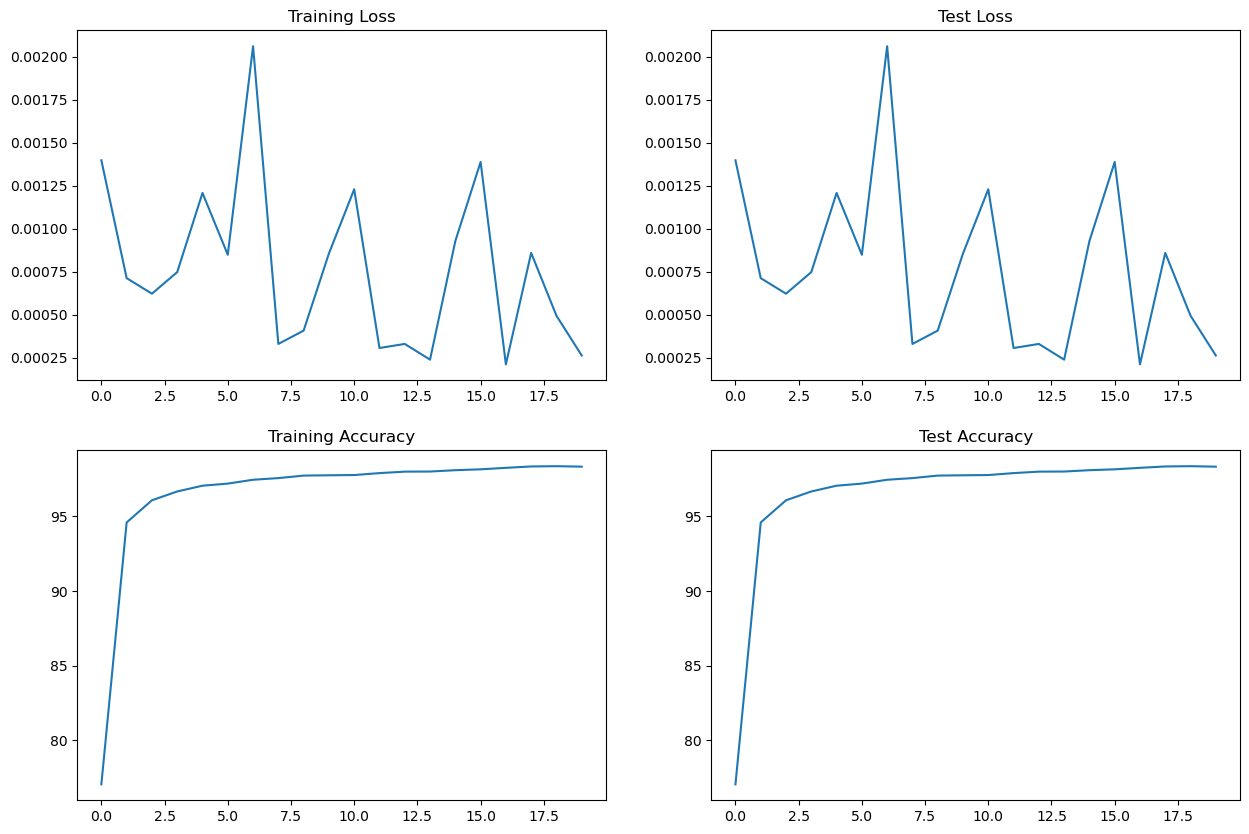

In [4]:
from utils import plot_results
plot_results(train_accuracy_per_epoch, train_loss_per_epoch, test_accuracy_per_epoch, test_loss_per_epoch)